In [1]:
# -*- coding: utf-8 -*-
"""
PESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis
Created on Tue Sep 17 08:44:33 2024

@author: jmanitz
"""

'\nPESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis\nCreated on Tue Sep 17 08:44:33 2024\n\n@author: jmanitz\n'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# import data
path = "/Users/navne/OneDrive/Desktop/Jule/Documents/climate_projects/ocean_capstone/acoustics_data_2020.csv"
dt = pd.read_csv(path, skipinitialspace=True, delimiter=";", low_memory=False)
dt.columns

Index(['Barco', 'Viaje', 'Region_ID', 'Region_name', 'Region_class',
       'Process_ID', 'Sv_mean', 'NASC', 'Sv_max', 'Sv_min',
       ...
       'Exclude_below_line_depth_max', 'Exclude_below_line_range_max',
       'Samples_Below_Bottom_Exclusion', 'Samples_Above_Surface_Exclusion',
       'Samples_In_Domain', 'Bad_data_empty_water_samples', 'Heave_source',
       'Heave_min', 'Heave_max', 'Heave_mean'],
      dtype='object', length=105)

In [28]:
# Check for relevant variables in the data set; possible response variable
dt[["Region_ID", "Region_class", "Species_name","Species_percent","Species_TS"]].astype('category').describe()

,Region_ID,Region_class,Species_name,Species_percent,Species_TS
count,27392,27392,27392,27392,27392
unique,5600,15,1,1,1
top,86,ANC,Unassigned,100,-40
freq,23,13763,27392,27392,27392


<Axes: title={'center': 'Frequency of Region_class'}, xlabel='Count', ylabel='Region_class'>

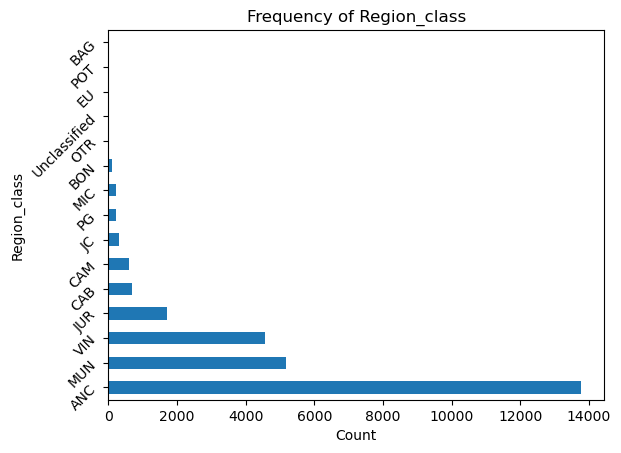

In [30]:
# Visualize Frequency of Region_class
dt["Region_class"].value_counts().plot(kind='barh',  rot=45, 
                                      ylabel='Region_class', xlabel='Count', title ="Frequency of Region_class")

In [32]:
# Frequency of Region_class
dt["Region_class"].value_counts()

Region_class
ANC             13763
MUN              5184
VIN              4567
JUR              1716
CAB               678
CAM               593
JC                322
PG                230
MIC               208
BON               103
OTR                10
Unclassified        8
EU                  6
POT                 2
BAG                 2
Name: count, dtype: int64

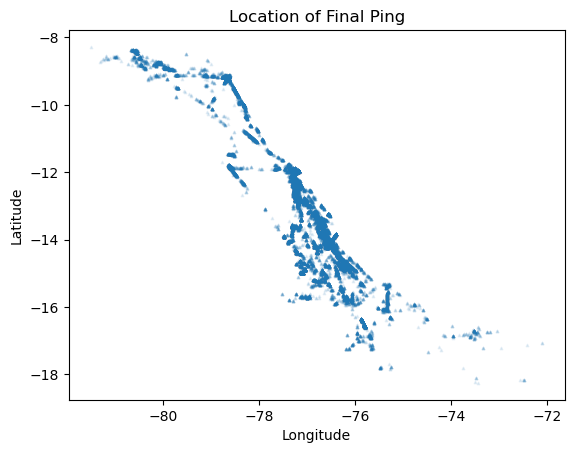

In [34]:
# Plot location at the final ping ('Lat_E', 'Lon_E')
plt.scatter(x=dt['Lon_E'], y=dt['Lat_E'], s=3, marker="^", alpha=0.1)
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
plt.title ('Location of Final Ping')
plt.show()

In [36]:
# Most important predictors
dt[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise", "ABC"]].describe()


,Height_mean,Depth_mean,Sv_mean,NASC,Sv_max,Sv_min,Sv_noise,ABC
count,27392.000000,27392.000000,27392.000000,2.739200e+04,27392.000000,27392.000000,27392.000000,2.739200e+04
mean,1.611526,34.877970,-160.970967,4.095618e+03,-151.590879,-167.704261,-980.418479,9.502279e-05
std,2.417622,55.066196,297.059548,1.042351e+05,300.393569,294.553784,10.650949,2.418366e-03
min,0.002306,0.725327,-999.000000,0.000000e+00,-999.000000,-999.000000,-1006.124041,0.000000e+00
25%,0.494609,7.498035,-65.007585,9.705766e+00,-55.219006,-64.988363,-986.730548,2.250000e-07
50%,0.787972,12.852724,-56.805446,7.819750e+01,-47.611876,-64.817348,-980.091839,1.815000e-06
75%,1.644000,27.789329,-50.498772,3.707061e+02,-40.971255,-63.641564,-973.618896,8.600000e-06
max,43.515127,315.094719,-7.530407,1.662787e+07,-0.253201,-42.212651,-941.014280,3.857846e-01


array([[<Axes: xlabel='Height_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Height_mean'>,
        <Axes: xlabel='NASC', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Height_mean'>,
        <Axes: xlabel='ABC', ylabel='Height_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='NASC', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Depth_mean'>,
        <Axes: xlabel='ABC', ylabel='Depth_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Sv_mean'>,
 

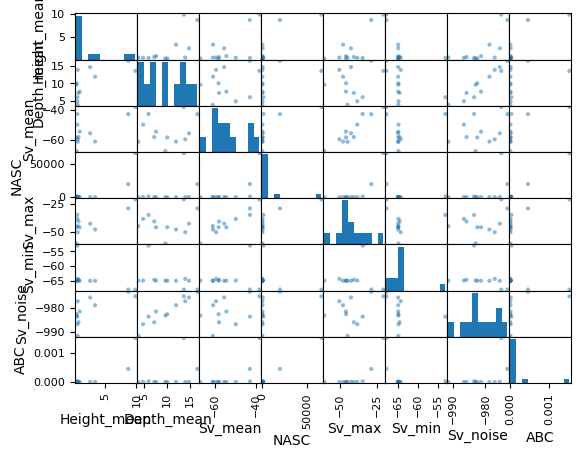

In [40]:
# Plot predictors of interest
dt3 = dt.loc[lambda dt: dt['Region_ID'] == 3] # Subset data for exploration purposes
pd.plotting.scatter_matrix(dt3[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise","ABC"]])

Text(0.5, 1.0, 'Average Shoal Height and Depth')

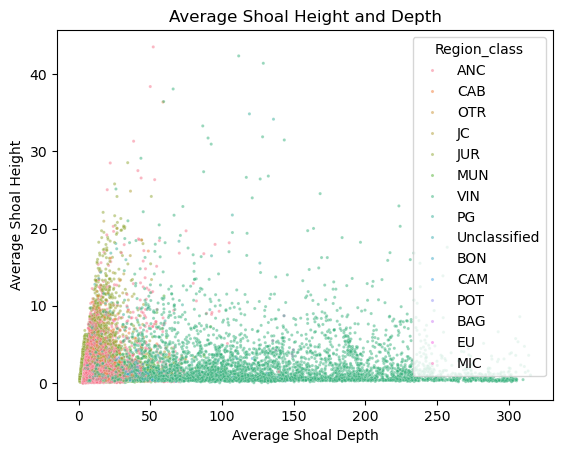

In [42]:
# Average Shoal Height and Depth 
sns.scatterplot(dt, y="Height_mean", x="Depth_mean", hue="Region_class", alpha=0.5, s=5)
plt.ylabel ('Average Shoal Height')
plt.xlabel ('Average Shoal Depth')
plt.title ('Average Shoal Height and Depth')

In [11]:
# Backscatter volume mean strength vs Nautical acoustic dispersion coefficient
#sns.scatterplot(dt, x="Sv_mean", y="NASC", alpha=0.5)# hue="Region_class",
#plt.ylabel ('Nautical acoustic dispersion coefficient')
#plt.xlabel ('Backscatter volume mean strength')

Text(0, 0.5, '')

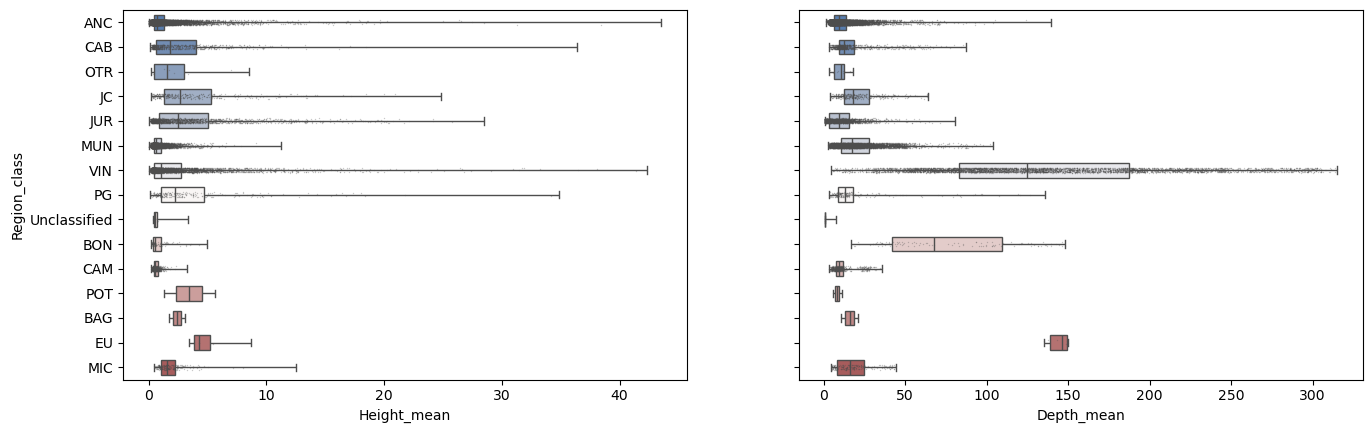

In [63]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Height_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Height_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])
sns.boxplot(data=dt, x="Depth_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="Depth_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

Text(0, 0.5, '')

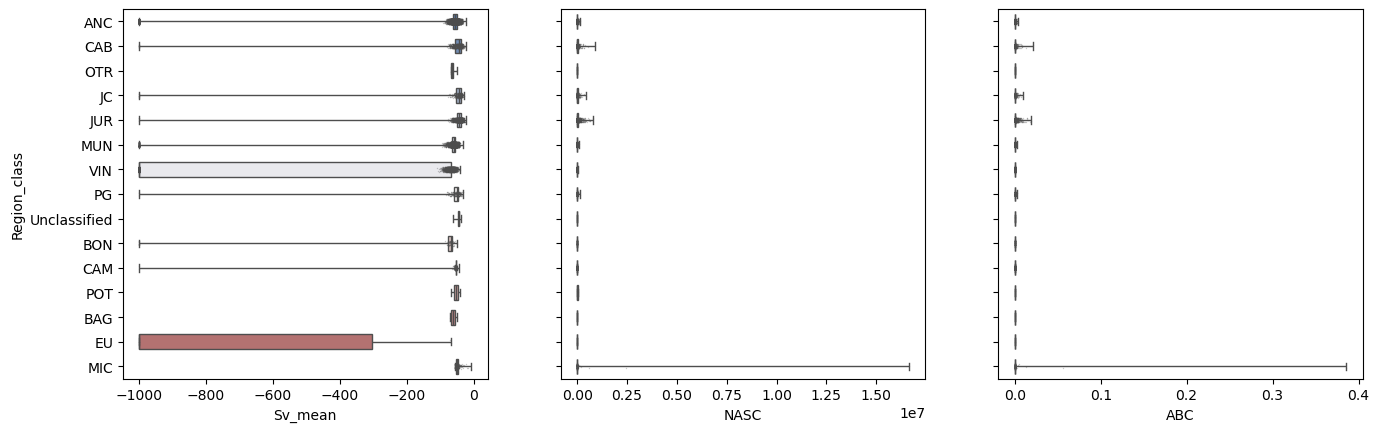

In [61]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Sv_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Sv_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])

sns.boxplot(data=dt, x="NASC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="NASC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
#plt.xscale("log", ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

sns.boxplot(data=dt, x="ABC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[2])
sns.stripplot(dt, x="ABC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[2])
#plt.xscale("log", ax=axs[1])
axs[2].set_yticklabels([])
axs[2].set_ylabel('')

Text(0.5, 0, '')

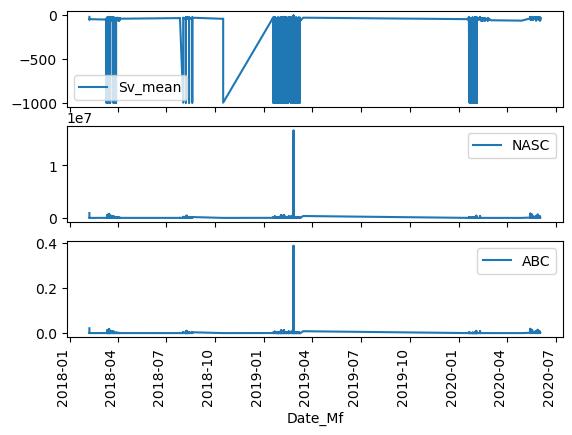

In [39]:
# Plot in terms of time of recording
dt['Date_Mf'] = pd.to_datetime(dt['Date_M'], format =  "%Y%m%d")
dtt = dt.sort_values('Date_Mf', ascending=True)

fig, axs = plt.subplots(ncols=3)
dtt.plot(x='Date_Mf', y='Sv_mean', rot='vertical', ax=axs[0]);
dtt.plot(x='Date_Mf', y='NASC', rot='vertical', ax=axs[1]);
dtt.plot(x='Date_Mf', y='ABC', rot='vertical', ax=axs[2]);

axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].set_xlabel('')